<a href="https://colab.research.google.com/github/surajpandey11/Startup_funding_prediction/blob/main/Copy_of_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [400]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
startup_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/Day 1/Copy of data_driven_investment_1.csv')

In [402]:
startup_df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [403]:
startup_df.shape

(1502175, 20)

In [404]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [405]:
startup_df['Application Category'].value_counts()

Education                  202514
Tools                      139262
Business                    87780
Books & Reference           85189
Entertainment               76582
Productivity                63135
Personalization             62694
Finance                     60828
Photography                 56762
Music & Audio               55885
Lifestyle                   53462
Social                      38896
Communication               37143
Travel & Local              37100
Health & Fitness            36996
Shopping                    31776
Simulation                  29967
News & Magazines            27598
Casual                      25771
Action                      24972
Video Players & Editors     24309
Puzzle                      24304
Sports                      20217
Arcade                      18639
Medical                     17691
Educational                 14675
Food & Drink                14230
Maps & Navigation           14028
Racing                      13608
Adventure     

In [406]:
startup_df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                                                           232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                                              124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                                                117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                        

In [407]:
startup_df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [408]:
startup_df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
c6e3f8dd58880bb50b3aaff2e93c28c2492b362a       1
5f04274d5d7b856176fdd135b93482ec5f6dde46       1
3dece8b8972f7df7899fe43b49c76a000b3b6dc0       1
8e4523c7986078f885adeb1ea9cfe61e87011518       1
c46a2726f02b46499d7d0b7ad32118de147a1368       1
Name: UUID, Length: 147741, dtype: int64

In [409]:
def datetime(x):
  import datetime
  x=str(x)
  a=int(x[0:4])
  b=int(x[4:6])
  c=int(x[6:])
  

  x = datetime.datetime(a, b, c)
  x.strftime("%Y %b %d")

  return x

In [410]:
startup_df['Month1']=startup_df['month'].apply(lambda x:datetime(x))

In [411]:
startup_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month1
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,2018-08-01
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,2018-08-01
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0,2018-08-01
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0,2018-08-01
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01


In [412]:
startup_df['Month2'] = pd.to_datetime(startup_df['Month1'])

startup_df['Month'] = startup_df['Month2'].dt.date

# startup_df['month_of_date'] = startup_df['Month1'].dt.month
startup_df['user_created_at_year_month'] = startup_df['Month1'].dt.strftime('%Y-%m')

In [413]:
startup_df.drop(columns=['Month1','Month2'],inplace=True)

## Not Funded Yet

In [414]:
partcular_df=startup_df[startup_df['UUID']== '4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27']

In [415]:
partcular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
1525,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000585,National,NaN,NaN,0.206667,0,2018-08-01,2018-08
2432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001211,National,NaN,NaN,0.116183,0,2018-08-01,2018-08
2433,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000104,National,NaN,NaN,0.333333,0,2018-08-01,2018-08
2434,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000262,National,NaN,NaN,0.085106,0,2018-08-01,2018-08
4238,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004756,National,NaN,NaN,0.072319,0,2018-08-01,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492313,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000857,National,NaN,NaN,0.004444,0,2019-01-01,2019-01
1492314,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000080,National,NaN,NaN,0.192308,0,2019-01-01,2019-01
1492315,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011600,National,NaN,NaN,0.002427,0,2019-01-01,2019-01
1495432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034384,National,NaN,NaN,0.088980,0,2019-01-01,2019-01


In [416]:
partcular_df['funding_ind'].value_counts()

0    2671
Name: funding_ind, dtype: int64

In [417]:
partcular_df = partcular_df.sort_values('Month')

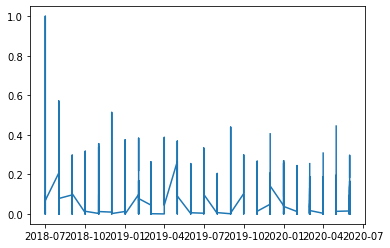

In [418]:
plt.plot(partcular_df['Month'],partcular_df['Uninstall_Rate'])

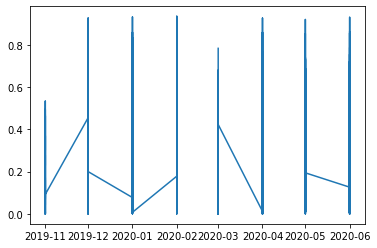

In [419]:
plt.plot(partcular_df['Month'],partcular_df['MAU'])

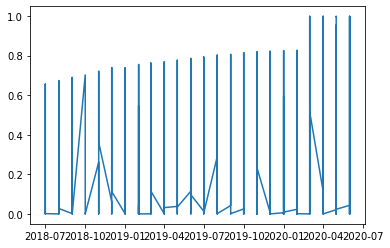

In [420]:
plt.plot(partcular_df['Month'],partcular_df['Reach'])

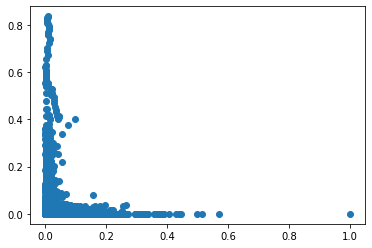

In [421]:
plt.scatter(partcular_df['Uninstall_Rate'],partcular_df['Reach'])

In [422]:
a=startup_df.groupby('UUID')

In [423]:
funded_df=startup_df[startup_df['funding_ind']==1]

In [424]:
funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018-08-01,2018-08
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,2018-08
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,2018-08
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018-08-01,2018-08
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018-08-01,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01,2019-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01,2019-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01,2019-01
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1,2019-01-01,2019-01


In [425]:
funded_df['Practice Areas'].value_counts()

FinTech                                                                                                                                                                             306
Consumer\nMedia & Entertainment\nEdTech                                                                                                                                             233
Media & Entertainment                                                                                                                                                               133
EdTech\nEdTech\nAccelerator Batches                                                                                                                                                 120
Consumer                                                                                                                                                                            117
                                                                                

In [426]:
funded_df['City'].value_counts()

Bangalore                   686
Gurgaon                     526
Delhi                       475
Mumbai                      356
Kingstown\nMumbai           107
Pune                         69
Noida                        35
Hyderabad                    31
Chennai                      21
San Mateo\nChennai           21
Ahmedabad                    16
Kolkata                       7
Jaipur                        7
Dublin\nBangalore             6
Kota                          6
Singapore\nGurgaon            5
Bhopal                        3
Coimbatore                    3
Hangzhou\nDelhi               3
Bangalore\nMumbai             3
Panaji                        3
Singapore\nBangalore          3
San Francisco\nBangalore      3
London                        3
Kochi                         2
Chicago\nNoida                2
Fremont\nMumbai               2
Faridabad                     1
London\nNoida                 1
Kanpur                        1
Name: City, dtype: int64

In [427]:
a=list(funded_df['UUID'])

### Funded 

In [428]:
funded_particular_df=startup_df[startup_df['UUID']== '30274688a665c39d0b9691836e24e2fb9afce6fe']

In [429]:
funded_particular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
11790,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000109,National,NaN,NaN,0.074074,0,2018-08-01,2018-08
11791,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000212,National,NaN,NaN,0.103448,0,2018-08-01,2018-08
11792,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000139,National,NaN,NaN,0.142857,0,2018-08-01,2018-08
11793,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,National,NaN,NaN,0.000000,0,2018-08-01,2018-08
11794,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000126,National,NaN,NaN,0.052632,0,2018-08-01,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500586,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000067,National,14634837.0,NaN,0.068966,1,2019-01-01,2019-01
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01,2019-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01,2019-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01,2019-01


In [430]:
funded_particular_df = funded_particular_df.sort_values('Month')

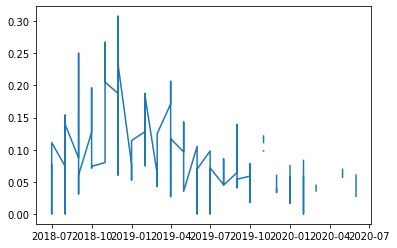

In [431]:

plt.plot(funded_particular_df['Month'],funded_particular_df['Uninstall_Rate'])

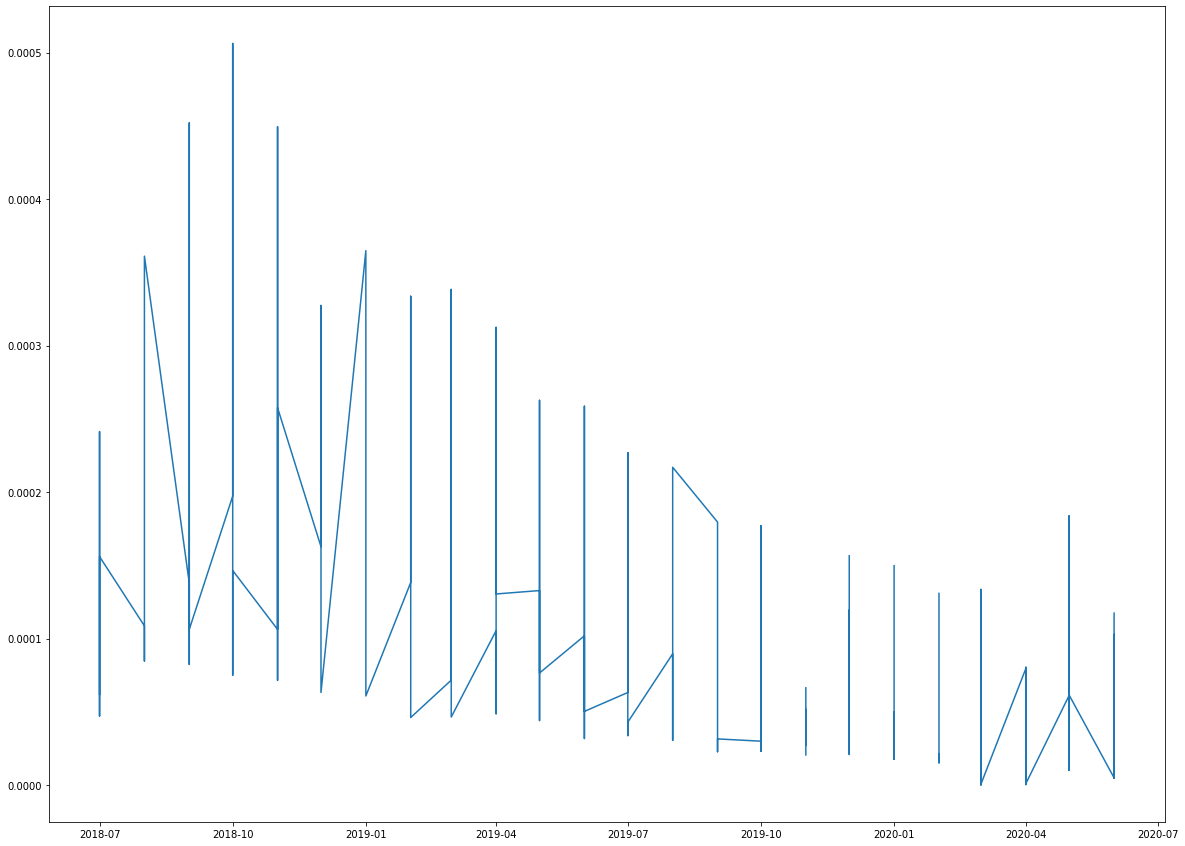

In [432]:
plt.figure(figsize=(20,15))
plt.plot(funded_particular_df['Month'],(funded_particular_df['Reach']))

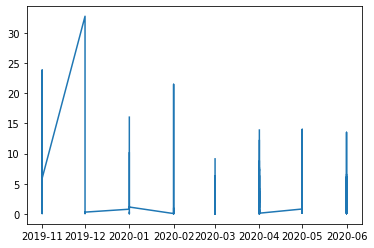

In [433]:
plt.plot(funded_particular_df['Month'],funded_particular_df['Avg_Session_Time'])

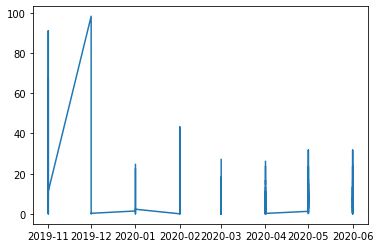

In [434]:
plt.plot(funded_particular_df['Month'],funded_particular_df['Total_Session_Time'])

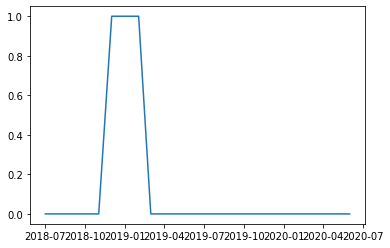

In [435]:
plt.plot(funded_particular_df['Month'],funded_particular_df['funding_ind'])

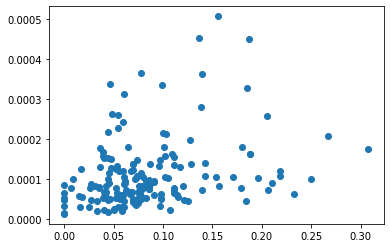

In [436]:
plt.scatter(funded_particular_df['Uninstall_Rate'],funded_particular_df['Reach'])

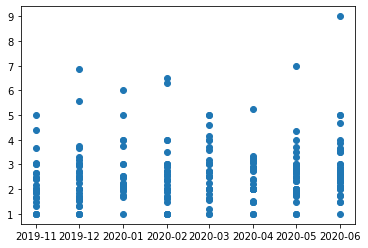

In [437]:
plt.scatter(funded_particular_df['Month'],funded_particular_df['Open_Rate'])

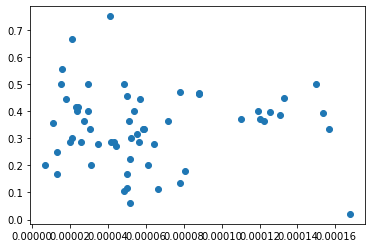

In [438]:
plt.scatter(funded_particular_df['Reach'],funded_particular_df['MAU'])

## Funded in starting

In [439]:
funded_particular_df_1=startup_df[startup_df['UUID']== 'cae68bf26bf59549fac77ec044954f939ab28c28']

In [440]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,2018-08
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0,2019-06-01,2019-06
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0,2019-12-01,2019-12
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0,2020-03-01,2020-03
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2019-02
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0,2020-02-01,2020-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,2019-03
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0,2020-06-01,2020-06
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,2018-09
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0,2019-07-01,2019-07


In [441]:
# import datetime

In [442]:
# def datetime(x):
#   import datetime
#   x=str(x)
#   a=int(x[0:4])
#   b=int(x[4:6])
#   c=int(x[6:])
  

#   x = datetime.datetime(a, b, c)
#   x.strftime("%Y %b %d")

#   return x


In [443]:
# funded_particular_df_1['Month']=funded_particular_df_1['month'].apply(lambda x:datetime(x))

In [444]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,2018-08
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0,2019-06-01,2019-06
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0,2019-12-01,2019-12
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0,2020-03-01,2020-03
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2019-02
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0,2020-02-01,2020-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,2019-03
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0,2020-06-01,2020-06
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,2018-09
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0,2019-07-01,2019-07


In [445]:
# from datetime import datetime

In [446]:
funded_particular_df_1 = funded_particular_df_1.sort_values('Month') 

In [447]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
794326,cae68bf26bf59549fac77ec044954f939ab28c28,20180701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000191,National,NaN,NaN,0.100000,0,2018-07-01,2018-07
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,2018-08
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,2018-09
807296,cae68bf26bf59549fac77ec044954f939ab28c28,20181001,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000115,National,1220353.0,NaN,0.269841,1,2018-10-01,2018-10
821177,cae68bf26bf59549fac77ec044954f939ab28c28,20181101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,National,NaN,NaN,0.229508,0,2018-11-01,2018-11
748076,cae68bf26bf59549fac77ec044954f939ab28c28,20181201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000078,National,NaN,NaN,0.322581,0,2018-12-01,2018-12
1490065,cae68bf26bf59549fac77ec044954f939ab28c28,20190101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000074,National,NaN,NaN,0.142857,0,2019-01-01,2019-01
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2019-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,2019-03
1107382,cae68bf26bf59549fac77ec044954f939ab28c28,20190401,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000083,National,NaN,NaN,0.200000,0,2019-04-01,2019-04


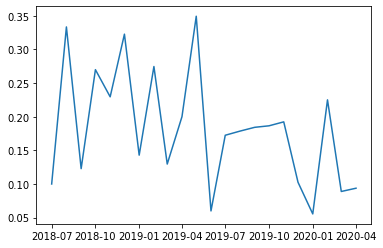

In [448]:
plt.plot(funded_particular_df_1['Month'],(funded_particular_df_1['Uninstall_Rate']))

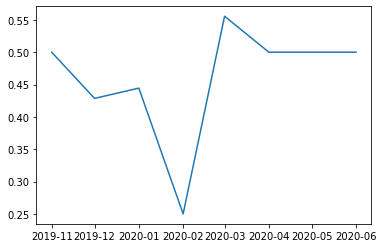

In [449]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['MAU'])

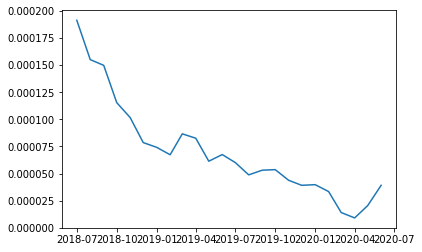

In [450]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Reach'])

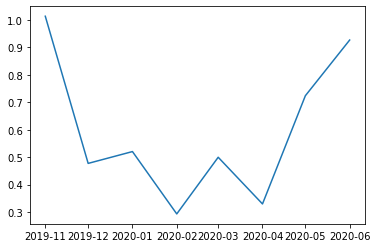

In [451]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Avg_Session_Time'])

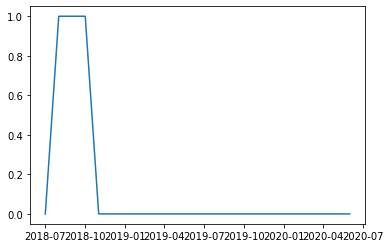

In [452]:
plt.plot(funded_particular_df_1['Month'],(funded_particular_df_1['funding_ind']))

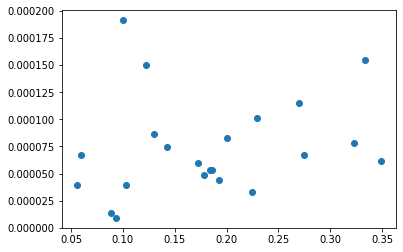

In [453]:
plt.scatter(funded_particular_df_1['Uninstall_Rate'],(funded_particular_df_1['Reach']))

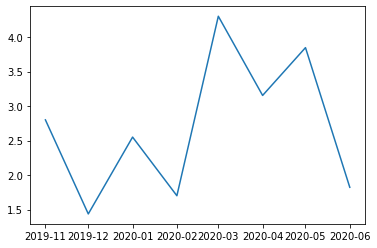

In [454]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Open_Rate'])

In [455]:
funded_particular_df_2=startup_df[startup_df['UUID']== '1579dd1ed49a18f4f7520a91721c6e435f7c588e']

In [456]:
funded_particular_df_2

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,2018-08
13470,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190601,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000651,National,NaN,NaN,0.194954,0,2019-06-01,2019-06
29429,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20191201,Social,2.049333,NaN,NaN,NaN,NaN,NaN,NaN,0.407643,9.009075,NaN,NaN,0.000383,National,NaN,17.946574,0.146635,0,2019-12-01,2019-12
131551,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200301,Social,1.820479,NaN,NaN,NaN,NaN,NaN,NaN,0.157534,15.797934,NaN,NaN,0.000152,National,NaN,28.190716,0.068966,0,2020-03-01,2020-03
417801,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000578,National,NaN,NaN,0.230303,0,2019-02-01,2019-02
432787,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200201,Social,2.158660,NaN,NaN,NaN,NaN,NaN,NaN,0.338346,16.013133,NaN,NaN,0.000256,National,NaN,34.660809,0.114068,0,2020-02-01,2020-02
536961,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190301,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610,National,NaN,NaN,0.238636,0,2019-03-01,2019-03
554053,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200601,Social,1.945067,NaN,NaN,NaN,NaN,NaN,NaN,0.362205,11.458453,NaN,NaN,0.000083,National,NaN,22.653343,0.127451,0,2020-06-01,2020-06
716125,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180901,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000817,National,NaN,NaN,0.262887,0,2018-09-01,2018-09
729696,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190701,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000605,National,NaN,NaN,0.198068,0,2019-07-01,2019-07


In [457]:
funded_particular_df_2 = funded_particular_df_2.sort_values('Month') 

In [458]:
funded_particular_df_2

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
792287,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180701,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000674,National,4473029.0,NaN,0.207407,1,2018-07-01,2018-07
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,2018-08
716125,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180901,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000817,National,NaN,NaN,0.262887,0,2018-09-01,2018-09
805071,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181001,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000724,National,NaN,NaN,0.275093,0,2018-10-01,2018-10
818883,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181101,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000700,National,NaN,NaN,0.295699,0,2018-11-01,2018-11
745749,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000546,National,NaN,NaN,0.389423,0,2018-12-01,2018-12
1487684,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190101,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000588,National,NaN,NaN,0.161765,0,2019-01-01,2019-01
417801,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000578,National,NaN,NaN,0.230303,0,2019-02-01,2019-02
536961,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190301,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610,National,NaN,NaN,0.238636,0,2019-03-01,2019-03
1104879,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190401,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000682,National,NaN,NaN,0.202970,0,2019-04-01,2019-04


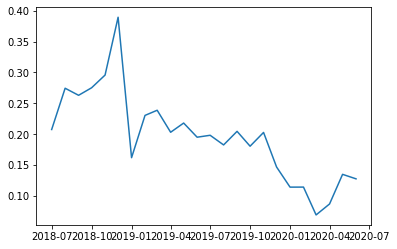

In [459]:
plt.plot(funded_particular_df_2['Month'],(funded_particular_df_2['Uninstall_Rate']))

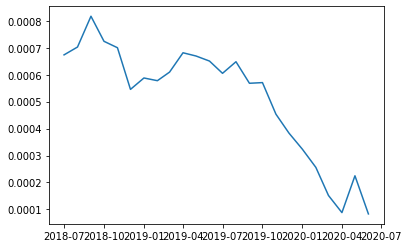

In [460]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Reach'])

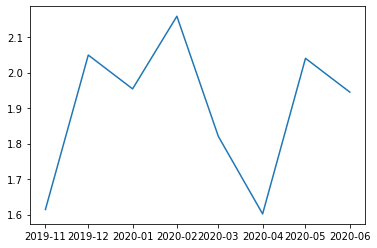

In [461]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Avg_Session_Time'])

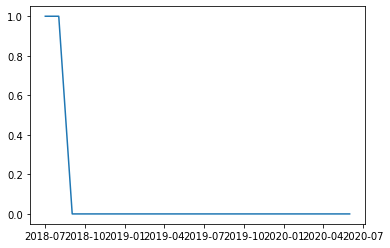

In [462]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['funding_ind'])

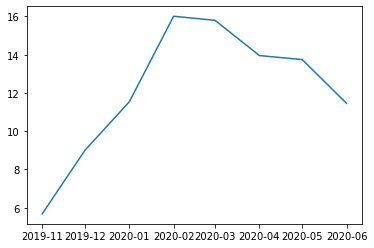

In [463]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Open_Rate'])

In [464]:
# gb = startup_df.groupby(tuple(startup_df.columns.difference(['Value'])))
# result = pd.DataFrame(gb['Value'].unique(), columns=startup_df.columns)

In [465]:
# startup_df=startup_df.groupby('UUID', as_index=False).agg(list)

In [466]:
startup_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,2018-08-01,2018-08
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,2018-08-01,2018-08
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0,2018-08-01,2018-08
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0,2018-08-01,2018-08
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0,2018-08-01,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01,2019-01
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01,2019-01
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01,2019-01
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01,2019-01


In [468]:
month_dummies = pd.get_dummies(startup_df.user_created_at_year_month)
pd.concat([startup_df, month_dummies], axis=1)


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,2018-08-01,2018-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,2018-08-01,2018-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0,2018-08-01,2018-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0,2018-08-01,2018-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0,2018-08-01,2018-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01,2019-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01,2019-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01,2019-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01,2019-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [469]:
startup_df=startup_df.groupby('UUID', as_index=False).agg(list)

In [470]:
startup_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[20200301, 20200301, 20200601, 20200401]","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[National, National, National, National]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]","[2020-03-01, 2020-03-01, 2020-06-01, 2020-04-01]","[2020-03, 2020-03, 2020-06, 2020-04]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[20200401],[Finance],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[National],[nan],[nan],[nan],[0],[2020-04-01],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[20200301, 20200201, 20200601, 20200501, 20200...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2020-03-01, 2020-02-01, 2020-06-01, 2020-05-0...","[2020-03, 2020-02, 2020-06, 2020-05, 2020-04]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[20200301, 20200501, 20200401]","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[National, National, National]","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]","[2020-03-01, 2020-05-01, 2020-04-01]","[2020-03, 2020-05, 2020-04]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[20200301],[Shopping],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[National],[nan],[nan],[nan],[0],[2020-03-01],[2020-03]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[20191201, 20200301, 20200601, 20200501, 20200...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2019-12-01, 2020-03-01, 2020-06-01, 2020-05-0...","[2019-12, 2020-03, 2020-06, 2020-05, 2020-04]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[20200301, 20200301, 20200301, 20200301, 20200...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, na

In [ ]:
startup_df

In [ ]:
import seaborn as sns

In [ ]:
plt.plot(startup_df['Reach'][0])

In [ ]:
print(startup_df['Reach'][0])